Importing libraries and the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [2]:
redWineQuality_df = pd.read_csv("C:\\Users\\Tarek\\Downloads\\wine+quality\\winequality-red.csv", delimiter=";")
whiteWineQuality_df = pd.read_csv("C:\\Users\\Tarek\\Downloads\\wine+quality\\winequality-white.csv", delimiter=";")

In [3]:
data = pd.concat([redWineQuality_df, whiteWineQuality_df])

Visuallize the data

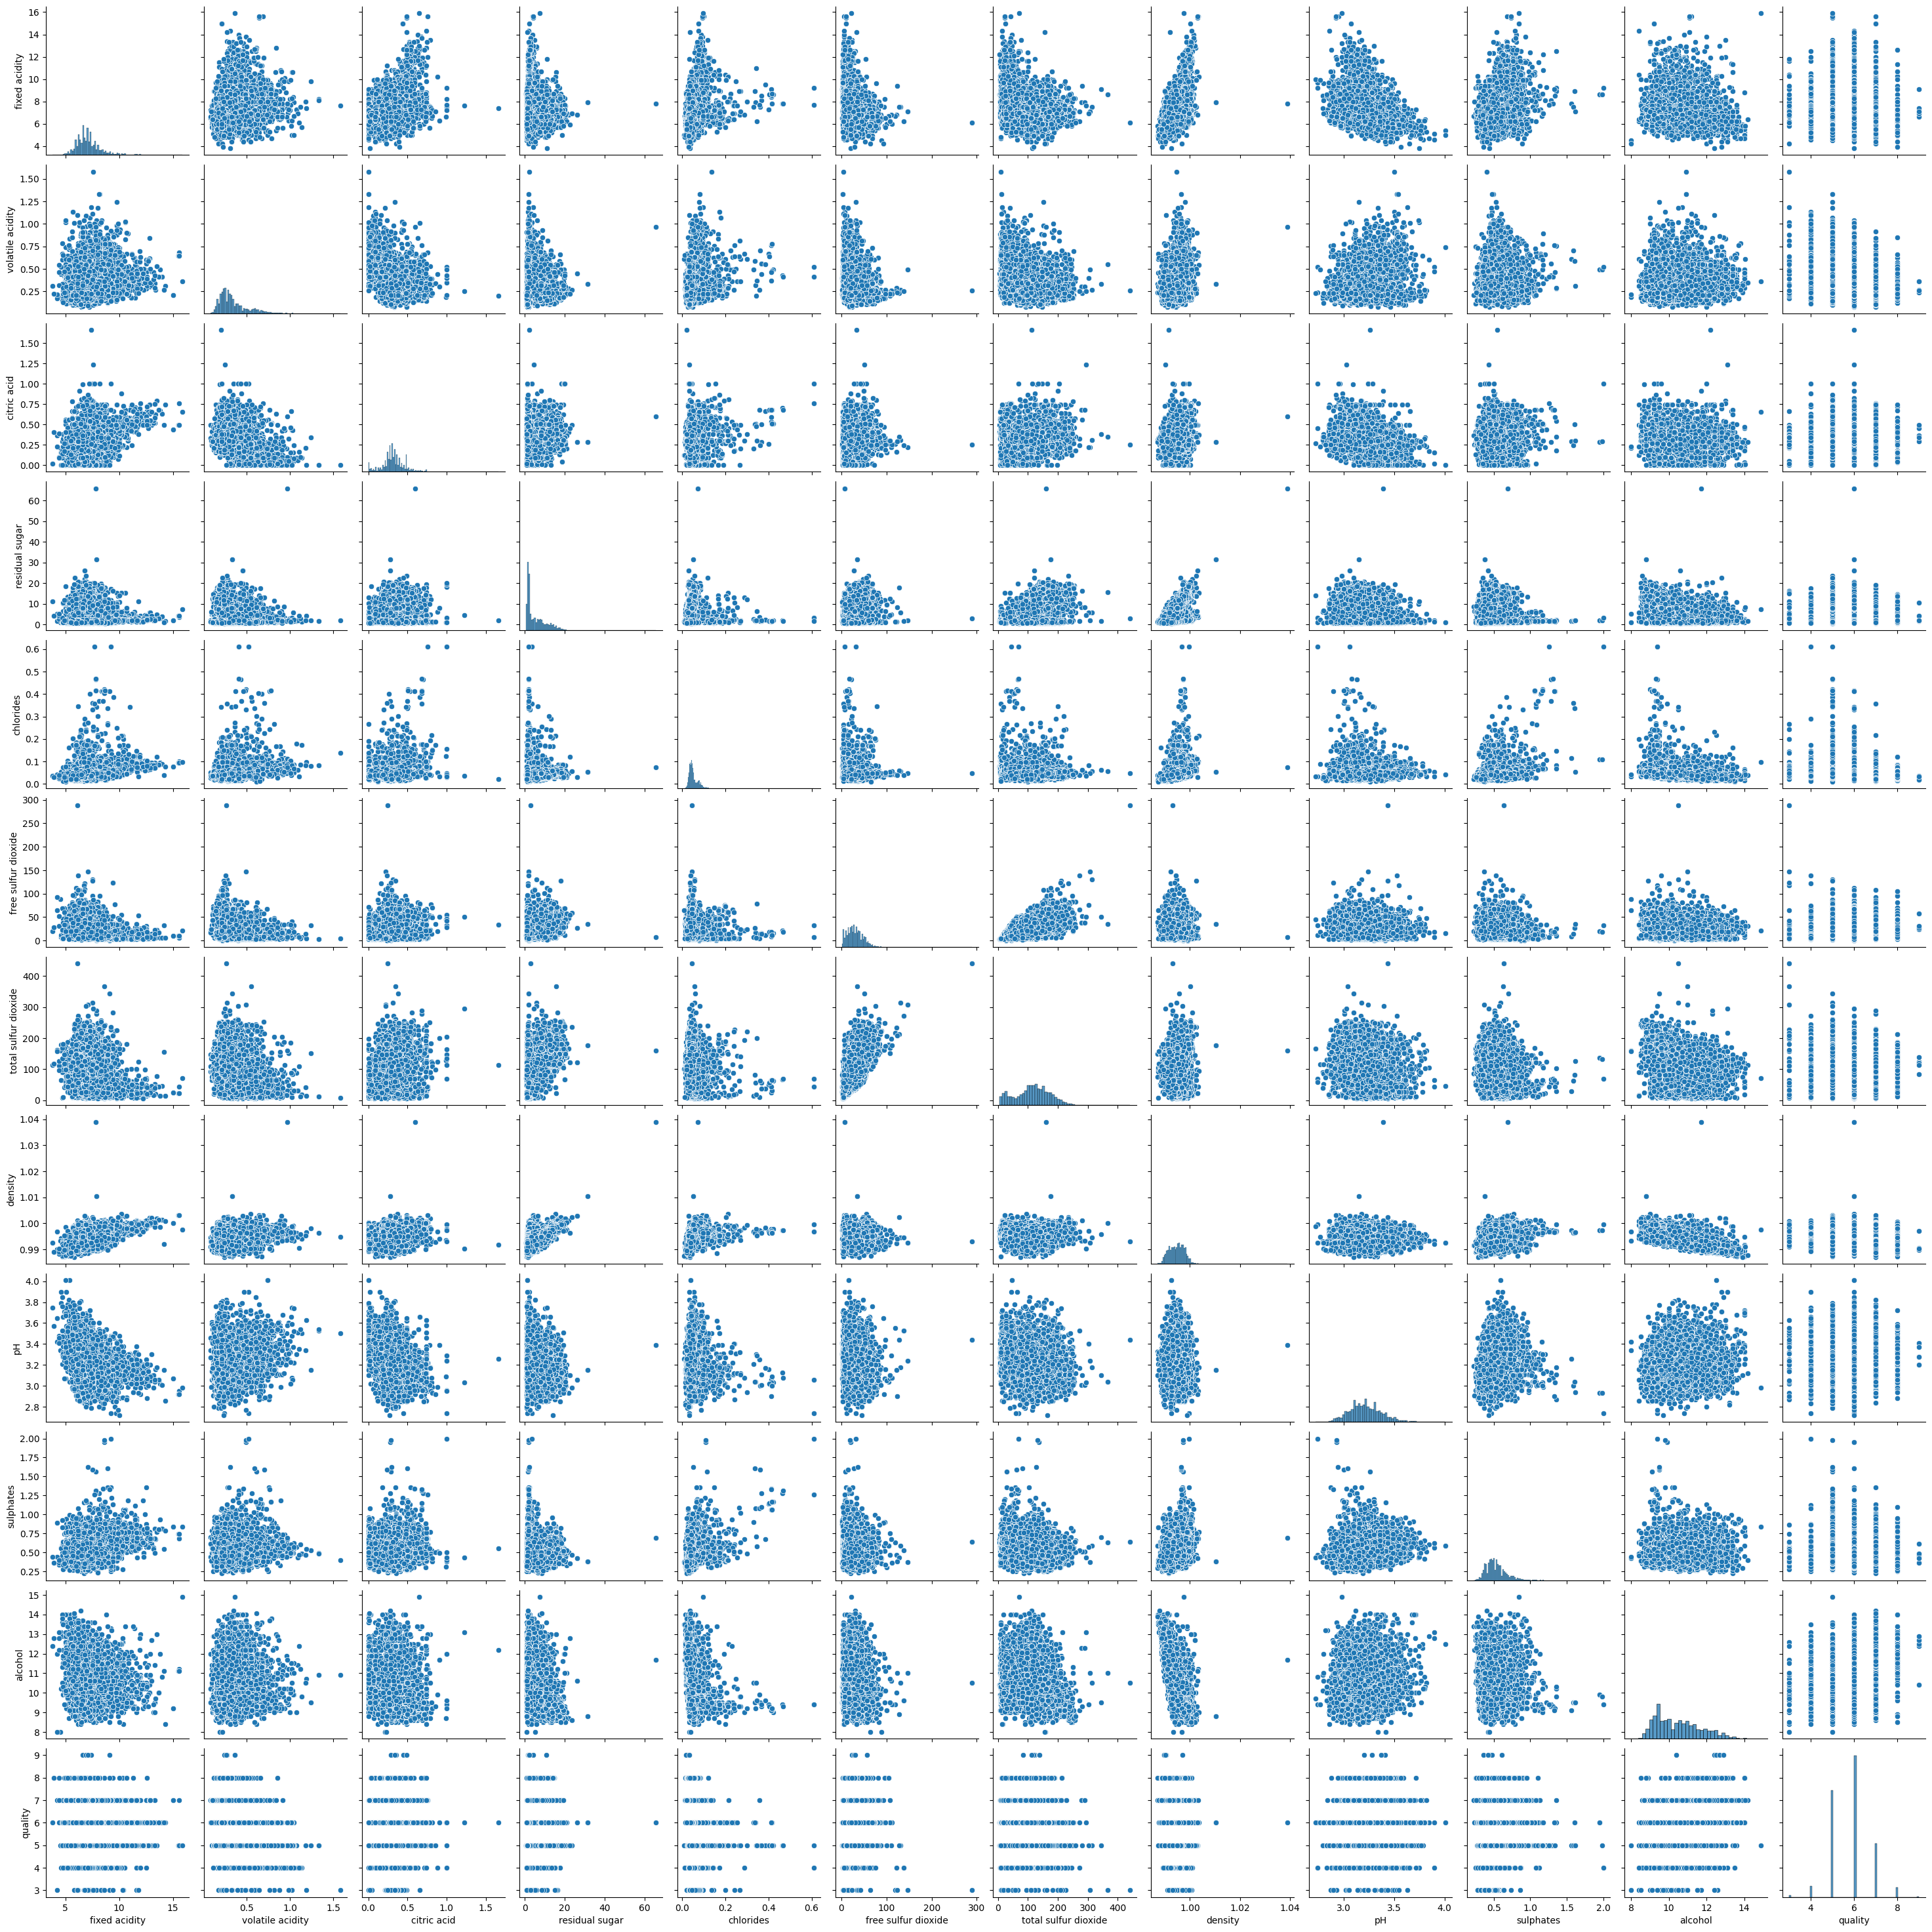

In [4]:
sns.pairplot(data)
plt.show()

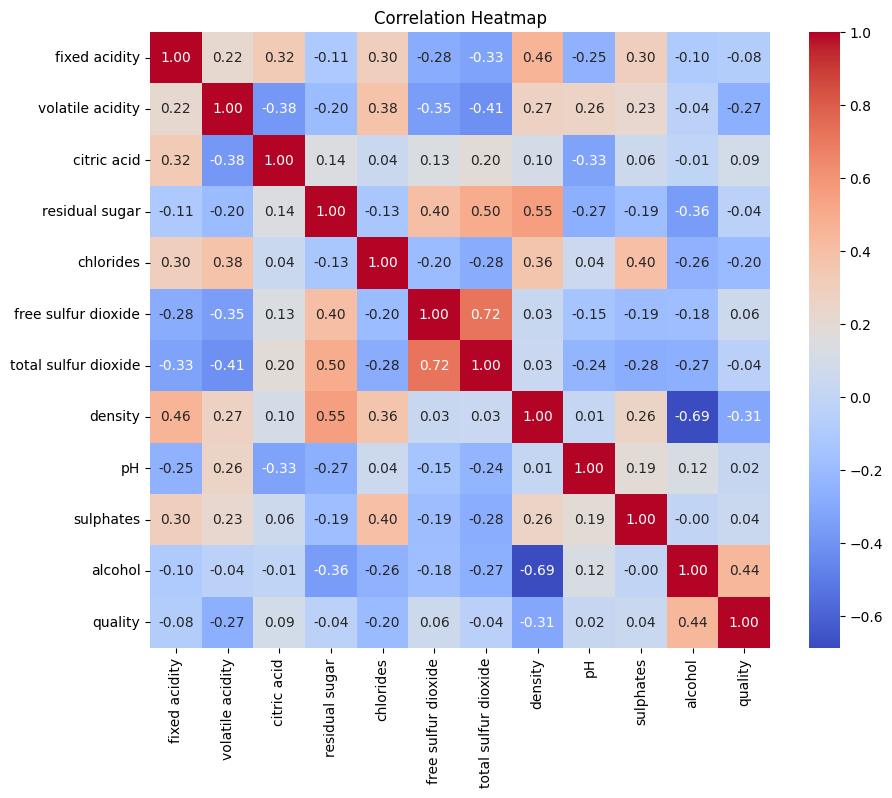

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Checks for outliers

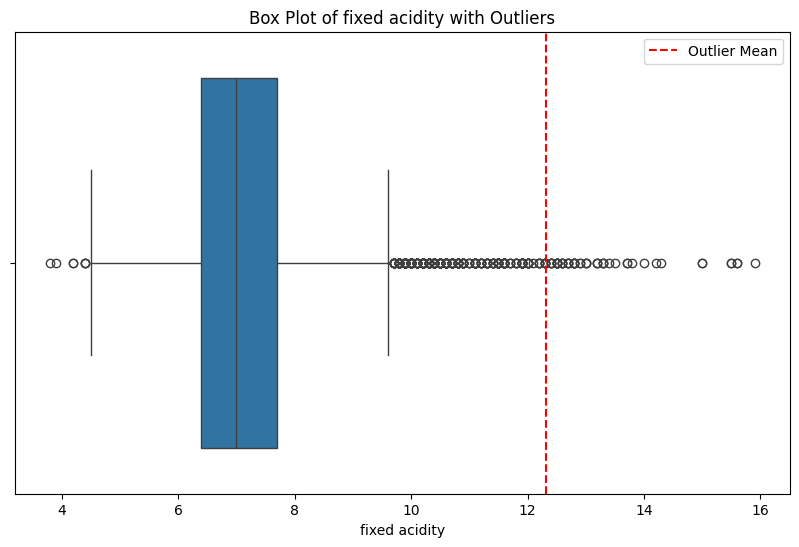

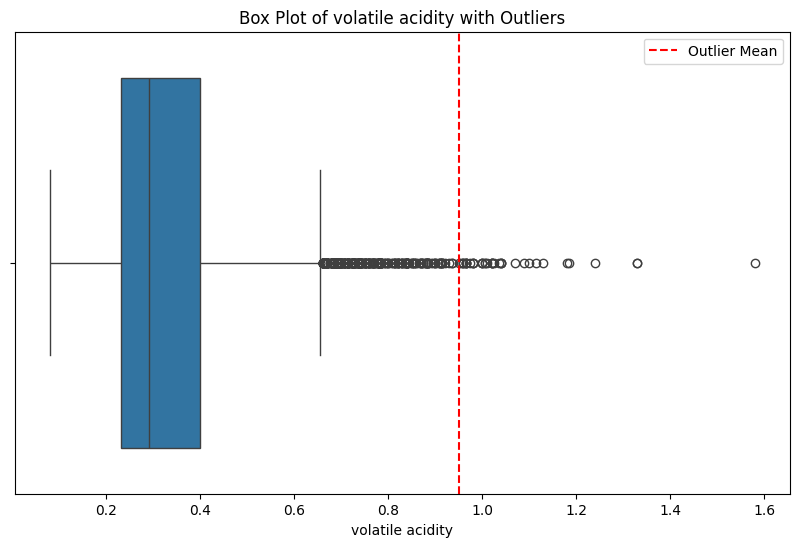

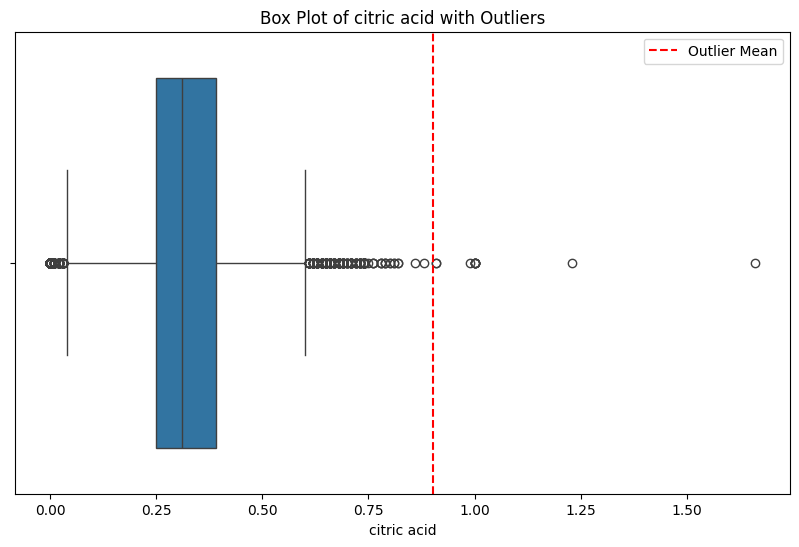

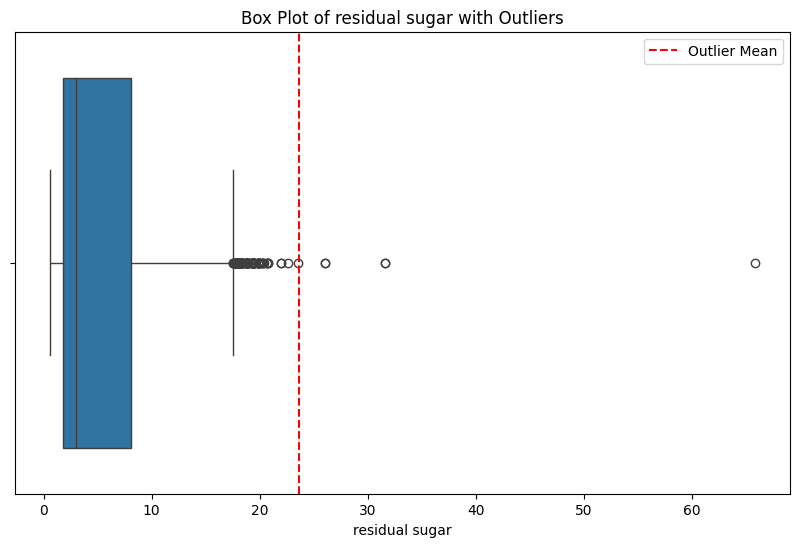

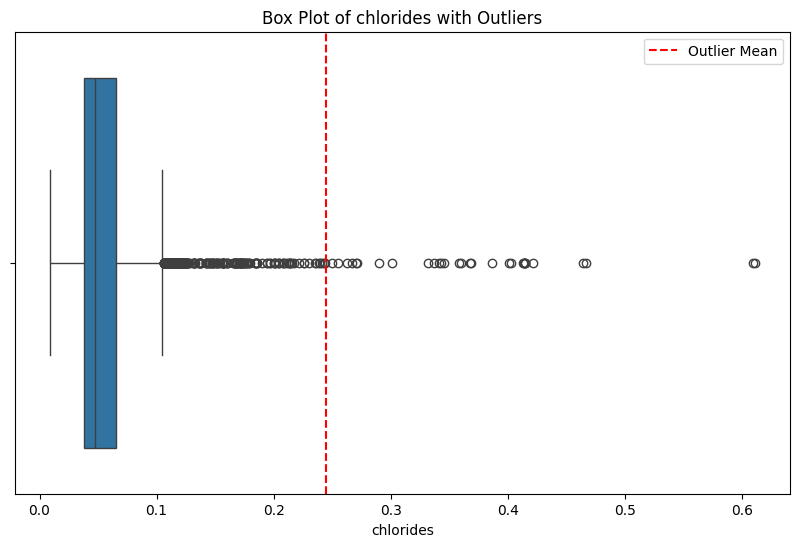

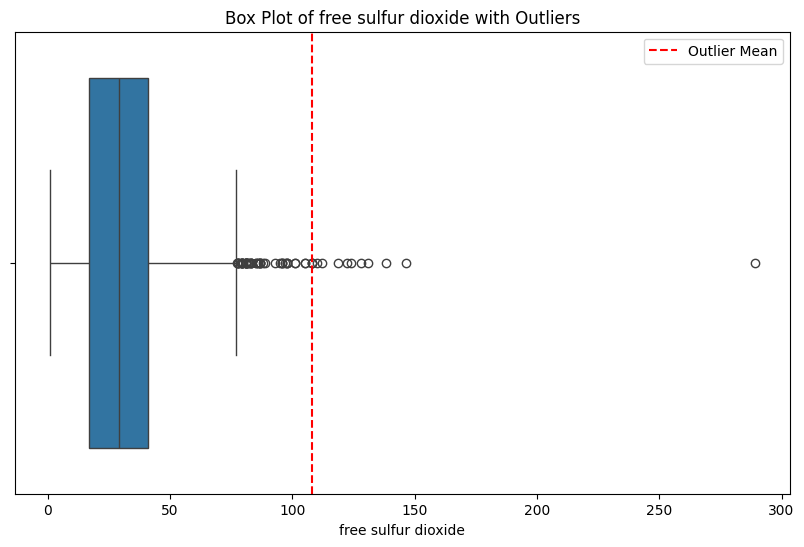

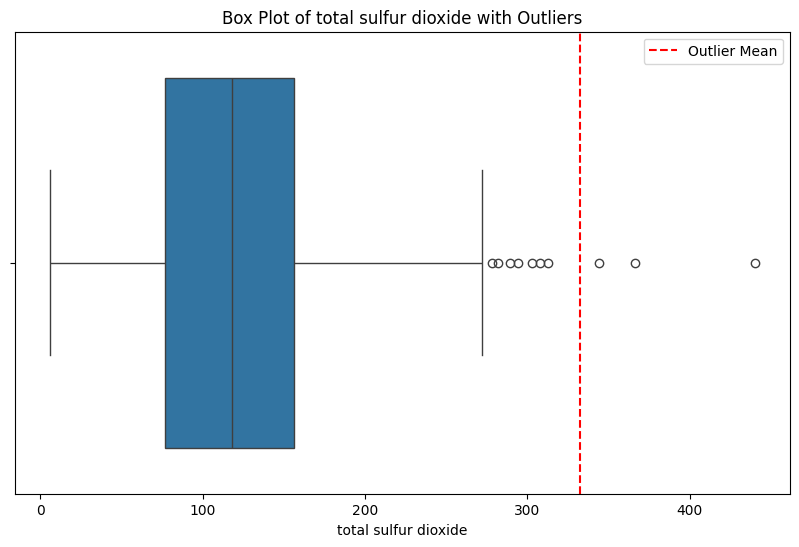

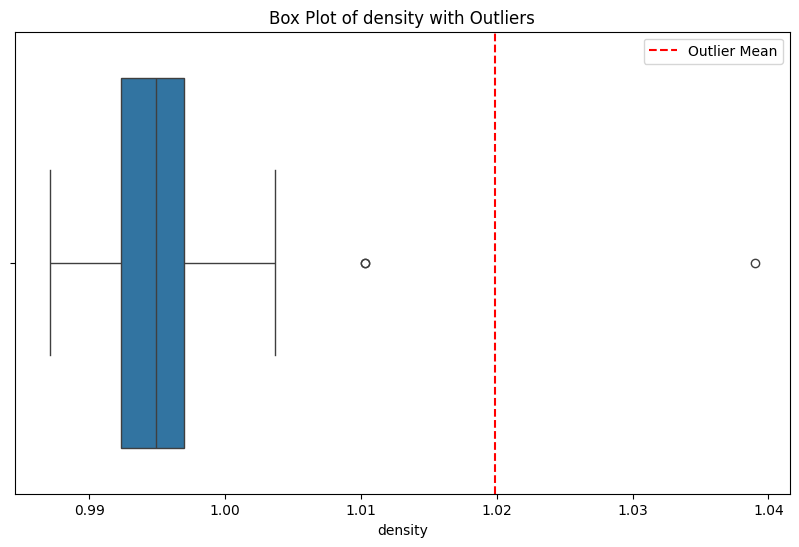

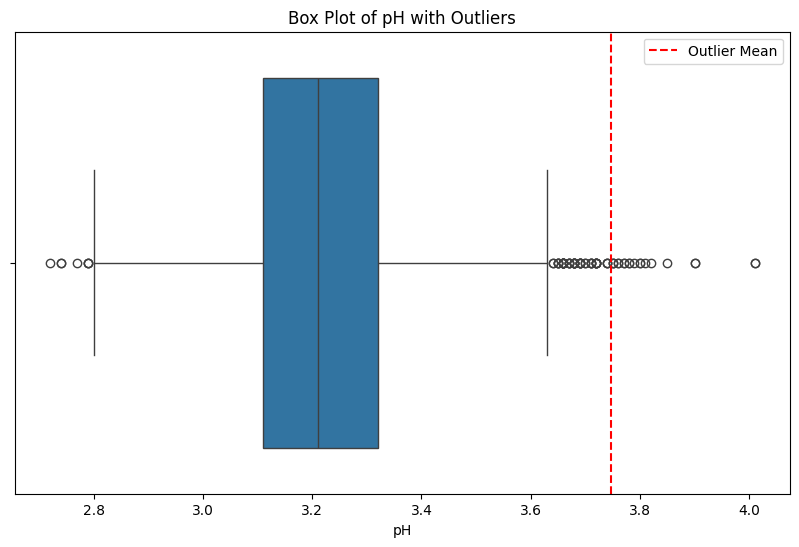

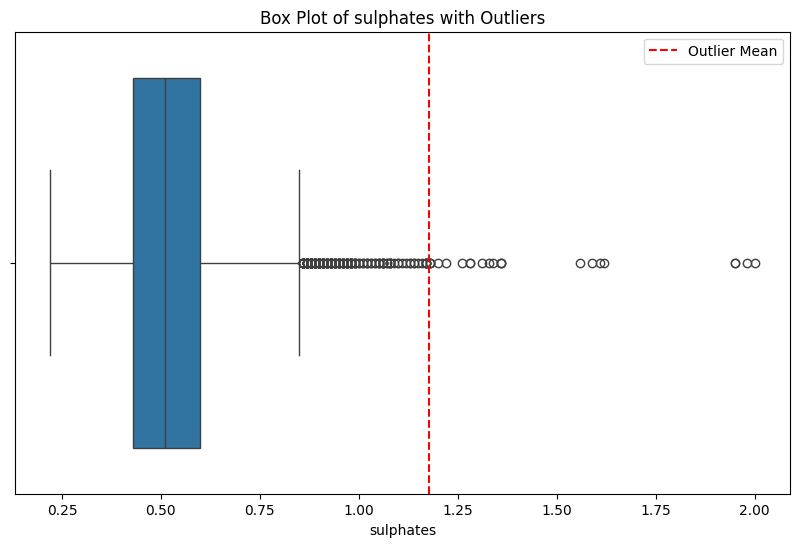

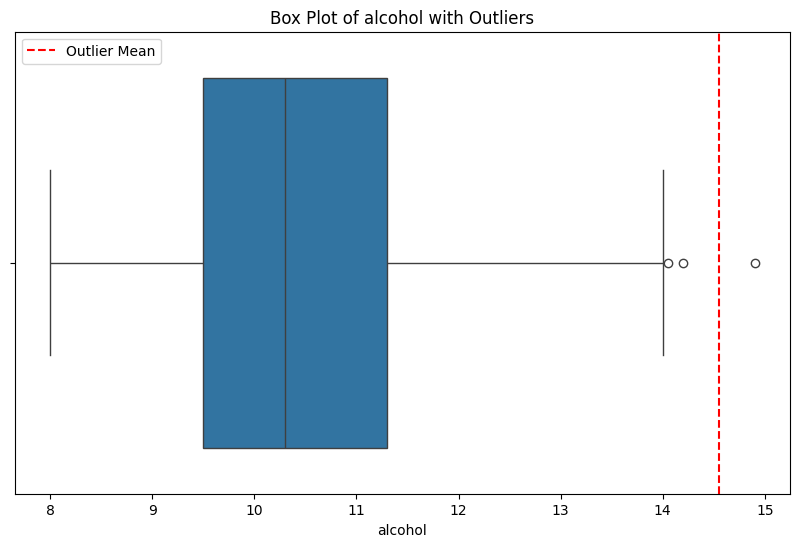

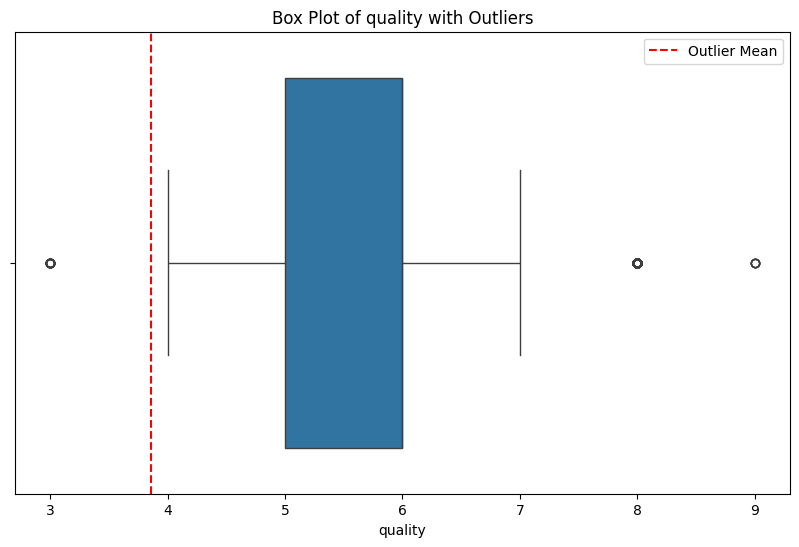

Outliers in fixed acidity:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3              11.2             0.280         0.56             1.9      0.075   
197            11.5             0.300         0.60             2.0      0.067   
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
212            11.6             0.440         0.64             2.1      0.059   
...             ...               ...          ...             ...        ...   
1362           11.6             0.475         0.40             1.4      0.091   
1454           11.7             0.450         0.63             2.2      0.073   
1548           11.2             0.400         0.50             2.0      0.099   
1526           14.2             0.270         0.49             1.1      0.037   
2050           11.8             0.230         0.38            11.1      0.034   


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
outlier_summary = {}

# Set the threshold for outlier detection
threshold = 3

# Loop through numeric columns to detect and visualize outliers
for column in data.select_dtypes(include='number').columns:
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    outlier_summary[column] = outliers
    
    # Create a box plot to visualize outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column} with Outliers')
    plt.axvline(x=outliers[column].mean(), color='red', linestyle='--', label='Outlier Mean')
    plt.legend()
    plt.show()

# Display outliers for each column in text format
for col, outliers in outlier_summary.items():
    print(f"Outliers in {col}:\n", outliers)


Change the target column to categorical and renaming the columns

In [7]:
data = data.replace({'quality' : {
                                    9 : 'Perfect',
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [8]:
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [9]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


Removing outliers using quantile

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Create a copy of the DataFrame to avoid modifying the original
cleaned_data = data.copy()

# Loop through numeric columns to remove outliers
for column in cleaned_data.select_dtypes(include='number').columns:
    Q1 = cleaned_data[column].quantile(0.25)  # First quartile
    Q3 = cleaned_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

In [11]:
cleaned_data.shape

(4596, 12)

In [12]:
cleaned_data["quality"].value_counts()

quality
Middle     3424
Good       1037
Bad         130
Perfect       5
Name: count, dtype: int64

In [13]:
y = cleaned_data["quality"]
X = cleaned_data.drop(["quality"], axis=1)

In [14]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


Split and normallize the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
print("X train shpae is", X_train.shape)
print("X test shpae is", X_test.shape)
print("y train shpae is", y_train.shape)
print("y test shpae is", y_test.shape)

X train shpae is (3676, 11)
X test shpae is (920, 11)
y train shpae is (3676,)
y test shpae is (920,)


Using the GridSearch to find the best params for our model

In [18]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

c:\Users\Tarek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=20.
  warnings.warn(


Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}
accuracy :  0.8509414350201949


In [26]:
model = RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_features = "sqrt")
model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [27]:
train_predictions = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_predictions)

In [28]:
test_predictions = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {round(train_accuracy, 2)}")
print(f"Test Accuracy: {round(test_accuracy, 2)}")

Training Accuracy: 1.0
Test Accuracy: 0.85
